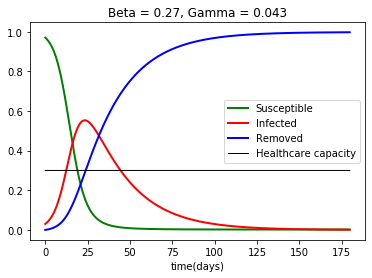

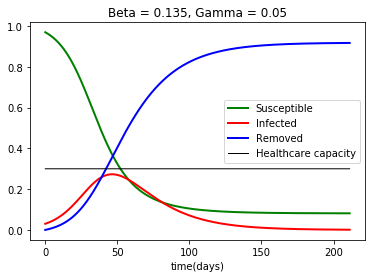

In [2]:
from scipy import integrate
import matplotlib.pyplot as plt

BETA = 0.27
GAMMA = 0.043
BETA_MODIF = 0.135
GAMMA_MODIF = 0.05

def f(t, y, beta, gamma):
    infect_rate = beta * y[0] * y[1]
    recover_rate = gamma * y[1]
    return [- infect_rate,
            infect_rate - recover_rate]

def jac(t, y, beta, gamma):
    return [[- beta * y[1], - beta * y[0]],
            [beta * y[1], beta * y[0] - gamma]]

y0 = [0.97, 0.03]
t0 = 0
dt = 0.1
tol = 1e-3

def simulate_SIR(y0, t0, dt, beta, gamma, tol=1e-2, fig=0):

    r = integrate.ode(f, jac).set_integrator('vode')
    r.set_initial_value(y0, t0).set_f_params(beta, gamma).set_jac_params(beta, gamma)

    S = [y0[0]]
    I = [y0[1]]
    R = [0]
    t = [t0]
    while r.y[1] > tol:
        r.integrate(r.t+dt)
        S.append(r.y[0])
        I.append(r.y[1])
        R.append(1 - sum(r.y))
        t.append(r.t)

    healthcare_cap = [0.3] * len(t)

    plt.figure(fig)
    plt.plot(t, S, lw=2, color='g',label= 'Susceptible')
    plt.plot(t, I, lw=2, color='r', label= 'Infected')
    plt.plot(t, R, lw=2, color='b', label= 'Removed')
    plt.plot(t, healthcare_cap, lw=1, color='black', label= 'Healthcare capacity')

    plt.xlabel('time(days)')
    plt.title(f'Beta = {beta}, Gamma = {gamma}')
    plt.legend()

def main():
    simulate_SIR(y0, t0, dt, BETA, GAMMA, tol)
    simulate_SIR(y0, t0, dt, BETA_MODIF, GAMMA_MODIF, tol, 1)
main()
